In [193]:
import pandas as pd

df     = pd.read_csv('recommender-dataset-test-3.csv')
cities = pd.read_csv('cities.csv')
states = pd.read_csv('us_population.csv', encoding='latin1')
densities = pd.read_json('us-states.json')
df = df.merge(cities, left_on='city', right_on='city')

In [194]:
states['population'] = pd.to_numeric(states['population'], errors='coerce')
states

Rank in the fifty states, 2017  Rank in all states and territories, 2010  \
0                               1                                         1   
1                               2                                         2   
2                               3                                         4   
3                               4                                         3   
4                               5                                         6   
5                               6                                         5   
6                               7                                         7   
7                               8                                         9   
8                               9                                        10   
9                              10                                         8   
10                             11                                        11   
11                             12                                        12   
12                             13                                        13   
13                             14                                        16   
14                             15                                        14   
15                             16                                        17   
16                             17                                        15   
17                             18                                        18   
18                             19                                        19   
19                             20                                        20   
20                             21                                        22   
21                             22                                        21   
22                             23                                        24   
23                             24                                        23   
24                             25                                        25   
25                             26                                        26   
26                             27                                        27   
27                             28                                        28   
28                             29                                        30   
29                                                                      29   
30                             30                                        31   
31                             31                                        35   
32                             32                                        33   
33                             33                                        36   
34                             34                                        32   
35                             35                                        34   
36                             36                                        37   
37                             37                                        39   
38                             38                                        38   
39                             39                                        40   
40                             40                                        41   
41                             41                                        43   
42                             42                                        42   
43                             43                                        44   
44                             44                                        45   
45                             45                                        46   
46                             46                                        47   
47                             47                                        49   
48                             48                                        48   
49                                                  

In [174]:
ddf = pd.merge(df, states, left_on='region_y', right_on='state', how='left')

In [247]:
ddf['drinking']

0     Social Drinker
1     Social Drinker
2     Social Drinker
3     Social Drinker
4     Social Drinker
5        Non Drinker
6      Heavy Drinker
7      Heavy Drinker
8        Non Drinker
9        Non Drinker
10    Social Drinker
11    Social Drinker
12    Social Drinker
13    Social Drinker
14    Social Drinker
15    Social Drinker
16    Social Drinker
17    Social Drinker
18    Social Drinker
19    Social Drinker
20    Social Drinker
21    Social Drinker
22    Social Drinker
23    Social Drinker
24    Social Drinker
25    Social Drinker
26    Social Drinker
27    Social Drinker
28       Non Drinker
29       Non Drinker
30       Non Drinker
31    Social Drinker
32    Social Drinker
33    Social Drinker
34    Social Drinker
35       Non Drinker
36       Non Drinker
37    Social Drinker
38    Social Drinker
39    Social Drinker
40    Social Drinker
41    Social Drinker
Name: drinking, dtype: object

In [252]:
bodies = {'Slim':1, 'Athletic':2, 'Average':3, 'Curvy':4, 'A Few Extra Pounds':5}

def convertBody(body):
    return bodies[body]

ddf['body type'].replace(bodies, inplace=True)

In [253]:
ddf['body type']

0     1
1     2
2     1
3     1
4     1
5     4
6     5
7     3
8     2
9     1
10    5
11    5
12    5
13    5
14    5
15    5
16    5
17    5
18    5
19    5
20    3
21    3
22    3
23    2
24    2
25    2
26    2
27    2
28    1
29    1
30    1
31    4
32    4
33    4
34    4
35    2
36    1
37    2
38    2
39    5
40    5
41    2
Name: body type, dtype: int64

In [178]:
ddf['SBF_total'] = ddf['population'] / ddf['SBF']


In [180]:
ddf[['SBF_total', 'state']]

SBF_total           state
0   6.576186e+02       Minnesota
1   3.373147e+03      California
2   1.804491e+05        New York
3   3.284115e+04            Ohio
4   2.481175e+06        New York
5   5.744135e+04            Utah
6   1.442623e+03         Florida
7   1.537195e+04      California
8   8.822112e+01        New York
9   8.822112e+01        New York
10  1.559050e+05   Massachusetts
11  3.627216e+05      California
12  5.416386e+05         Alabama
13  3.259800e+03       Louisiana
14  2.368333e+04     Mississippi
15  1.286521e+06      New Jersey
16  1.004039e+04         Indiana
17  3.766160e+05          Oregon
18  3.198088e+05       Tennessee
19  9.667507e+04        Colorado
20  3.030061e+04        Kentucky
21  3.331031e+05            Ohio
22           NaN             NaN
23  1.029600e+05      California
24  7.503150e+04         Georgia
25  3.538074e+06           Texas
26  3.666229e+04            Ohio
27  4.982365e+05        Virginia
28  8.089943e+02  North Carolina
29  1.660385e+05        Michigan
30  8.394980e+05       Tennessee
31  5.514178e+03      California
32  7.448578e+05           Texas
33  1.364700e+05        Michigan
34  2.590667e+05         Florida
35  4.669500e+02      California
36  4.669500e+02      California
37  6.097535e+03  South Carolina
38  6.622555e+04      California
39  5.643432e+04      New Mexico
40  6.289153e+01          Nevada
41  1.325399e+03      California

In [184]:
import geopandas as gpd
densities = gpd.read_file('us-states.json')
# densities


In [188]:
densedf = pd.DataFrame(densities[['name', 'density']])

In [189]:
densedf

name    density
0                Alabama     94.650
1                 Alaska      1.264
2                Arizona     57.050
3               Arkansas     56.430
4             California    241.700
5               Colorado     49.330
6            Connecticut    739.100
7               Delaware    464.300
8   District of Columbia  10065.000
9                Florida    353.400
10               Georgia    169.500
11                Hawaii    214.100
12                 Idaho     19.150
13              Illinois    231.500
14               Indiana    181.700
15                  Iowa     54.810
16                Kansas     35.090
17              Kentucky    110.000
18             Louisiana    105.000
19                 Maine     43.040
20              Maryland    596.300
21         Massachusetts    840.200
22              Michigan    173.900
23             Minnesota     67.140
24           Mississippi     63.500
25              Missouri     87.260
26               Montana      6.858
27              Nebraska     23.970
28                Nevada     24.800
29         New Hampshire    147.000
30            New Jersey   1189.000
31            New Mexico     17.160
32              New York    412.300
33        North Carolina    198.200
34          North Dakota      9.916
35                  Ohio    281.900
36              Oklahoma     55.220
37                Oregon     40.330
38          Pennsylvania    284.300
39          Rhode Island   1006.000
40        South Carolina    155.400
41          South Dakota     98.070
42             Tennessee     88.080
43                 Texas     98.070
44                  Utah     34.300
45               Vermont     67.730
46              Virginia    204.500
47            Washington    102.600
48         West Virginia     77.060
49             Wisconsin    105.200
50               Wyoming      5.851
51           Puerto Rico   1082.000

In [191]:
ddf = pd.merge(ddf, densedf, left_on='region_y', right_on='name', how='left')

In [192]:
ddf

profile_id account type     sex            education  relationship status  \
0     15606651   attractive  Female         Some College               Single   
1     15606664   attractive    Male         Some College               Single   
2     15606666   attractive    Male         Some College               Single   
3     15606676   attractive    Male         Some College    Open Relationship   
4     15606676   attractive    Male         Some College    Open Relationship   
5     15606679   attractive  Female          High School               Single   
6     15606680     generous    Male  PhD / Post Doctoral  Married But Looking   
7     15606682   attractive  Female         Some College               Single   
8     15606689     generous    Male     Bachelors Degree               Single   
9     15606742   attractive  Female          High School               Single   
10    15606699     generous    Male    Associates Degree              Widowed   
11    15606707   attractive    Male      Graduate Degree               Single   
12    15606707   attractive    Male      Graduate Degree               Single   
13    15606707   attractive    Male      Graduate Degree               Single   
14    15606707   attractive    Male      Graduate Degree               Single   
15    15606707   attractive    Male      Graduate Degree               Single   
16    15606707   attractive    Male      Graduate Degree               Single   
17    15606707   attractive    Male      Graduate Degree               Single   
18    15606707   attractive    Male      Graduate Degree               Single   
19    15606707   attractive    Male      Graduate Degree               Single   
20    15606709   attractive  Female          High School               Single   
21    15606709   attractive  Female          High School               Single   
22    15606709   attractive  Female          High School               Single   
23    15606718   attractive  Female          High School               Single   
24    15606718   attractive  Female          High School               Single   
25    15606718   attractive  Female          High School               Single   
26    15606718   attractive  Female          High School               Single   
27    15606718   attractive  Female          High School               Single   
28    15606721   attractive  Female          High School               Single   
29    15606721   attractive  Female          High School               Single   
30    15606721   attractive  Female          High School               Single   
31    15606732   attractive  Female         Some College               Single   
32    15606732   attractive  Female         Some College               Single   
33    15606732   attractive  Female         Some College               Single   
34    15606732   attractive  Female         Some College               Single   
35    15606734   attractive    Male          High School               Single   
36    15606739   attractive  Female          High School               Single   
37    15606744   attractive    Male         Some College               Single   
38    15606745     generous    Male      Graduate Degree               Single   
39    15606751   attractive  Female         Some College  Married But Looking   
40    15606751   attractive  Female         Some College  Married But Looking   
41    15606756   attractive  Female    Associates Degree               Single   

             children       smoking        drinking  income  net worth  \
0                   0    Non Smoker  Social Drinker      \N         \N   
1                   1    Non Smoker  Social Drinker      \N         \N   
2                   0    Non Smoker  Social Drinker      \N         \N   
3                   0  Light Smoker  Social Drinker      \N         \N   
4                   0  Light Smoker  Social Drinker      \N         \N   
5                   0    Non Smoker     Non Drinker      \N         \N   
6 

# Just looking at state info

In [234]:
import pandas as pd

statedf = pd.read_json('city_list.min.json')
statedf = statedf.groupby('region').mean()
statedf = statedf[['SBF', 'SBM', 'SD', 'SM']]

In [235]:
statedf

SBF         SBM           SD         SM
region                                                               
Alabama                 79.857143   16.465201    17.542125   2.886447
Alaska                  62.193548   13.709677    17.483871   2.548387
Arizona                410.169643   96.303571    91.580357   8.651786
Arkansas                76.633094   15.625899    13.467626   1.928058
California             383.274376   83.405896   100.102041   6.365079
Colorado               198.012739   42.847134    42.426752   3.687898
Connecticut             97.639344   24.158470    23.256831   2.486339
Delaware                93.018868   21.113208    19.339623   2.679245
District Of Columbia  3967.333333  932.000000  1009.666667  88.666667
Florida                305.571429   67.681185    58.353659   6.987805
Georgia                314.319559   52.820937    52.487603   5.451791
Hawaii                  80.051724   23.206897    25.879310   1.827586
Idaho                   76.344828   16.741379    15.310345   1.310345
Illinois               199.153846   35.414201    45.278107   3.435897
Indiana                112.391941   22.721612    19.494505   2.358974
Iowa                    74.176991   16.681416    15.221239   1.778761
Kansas                 104.078261   22.600000    23.582609   2.330435
Kentucky                85.157895   17.157895    13.714912   2.087719
Louisiana              120.563452   25.563452    25.629442   2.807107
Maine                   35.505882    8.623529     8.470588   0.658824
Maryland               137.846715   28.171533    23.642336   3.116788
Massachusetts          111.297521   29.768595    43.727273   2.209366
Michigan               125.110312   26.865707    24.446043   2.573141
Minnesota              119.280612   24.954082    24.367347   2.198980
Mississippi             72.856164   12.719178    10.294521   2.171233
Missouri               121.808594   23.390625    22.902344   2.640625
Montana                 70.531250   15.593750    15.500000   0.875000
Nebraska               144.068182   30.795455    28.363636   2.659091
Nevada                1203.875000  164.375000   217.687500  14.645833
New Hampshire           49.872093   11.209302    12.755814   0.697674
New Jersey              86.507194   23.149281    22.561151   2.330935
New Mexico             142.489362   35.382979    28.085106   2.446809
New York               403.570461   85.043360    82.078591   7.174797
North Carolina         132.317460   26.154195    21.934240   2.911565
North Dakota            66.160000   14.840000    18.000000   1.440000
Ohio                   121.151874   25.272189    22.514793   2.700197
Oklahoma               135.885135   28.878378    24.891892   2.837838
Oregon                 183.487805   40.406504    34.772358   2.308943
Other                   10.500000    1.500000     5.000000   0.500000
Pennsylvania           107.123119   20.499316    18.254446   1.949384
Puerto Rico              7.333333    3.666667     2.000000   1.666667
Rhode Island           113.407407   28.222222    20.796296   2.148148
South Carolina         111.640777   21.490291    19.480583   2.582524
South Dakota            65.500000   12.961538    13.230769   1.153846
Tennessee              138.413655   26.028112    25.457831   3.176707
Texas                  335.006211   62.987578    80.520186   6.208075
Utah                   113.838095   25.914286    25.942857   2.961905
Vermont                 32.255814    7.744186     8.232558   0.558140
Virgin Islands          16.500000    4.000000     4.500000   0.000000
Virginia               140.231270   31.644951    33.400651   3.889251
Washington             187.543269   42.798077    43.615385   3.211538
Washington, Dc        4046.000000  890.000000  1069.000000  43.000000
West Virginia           52.303371   11.752809     8.831461   1.359551
Wisconsin              103.731481   21.842593    18.388889   2.388889
Wyoming                 37.428571    8.535714     8.464286   1.250000

In [236]:
testdf = pd.read_csv('recommender-dataset-test-3.csv')
testdf = testdf.merge(statedf, left_on='region', right_index=True)

In [255]:
bodies = {'Slim':1, 'Athletic':2, 'Average':3, 'Curvy':4, 'A Few Extra Pounds':5}
testdf['body type'].replace(bodies, inplace=True)

In [237]:
#find proportiojnality of profile views
testdf['SBF_props_favs'] = testdf['SBF'] / testdf['favorites']
testdf['SBF_props_pvs'] = testdf['SBF'] / testdf['profile views']
testdf['SBF_props_pvd'] = testdf['SBF'] / testdf['profile viewed']
testdf = testdf.drop(['income', 'net worth', 'profile_id', 'eye_color', 'hair color'], axis=1)

testdf = testdf.drop(['country', 'region', 'city'], axis=1)

testdf = testdf.drop(['SBF','SBM', 'SD', 'SM', 'SBF_props_favs', 'SBF_props_pvs', 'SBF_props_pvd'], axis=1)

testdf['account type'] = testdf['account type'].astype('category')
testdf.columns

Index(['account type', 'sex', 'education', 'relationship status', 'children',
       'smoking', 'drinking', 'height', 'body type', 'ethnicity', 'body_type',
       'birthdate', 'favorites', 'profile views', 'profile viewed'],
      dtype='object')

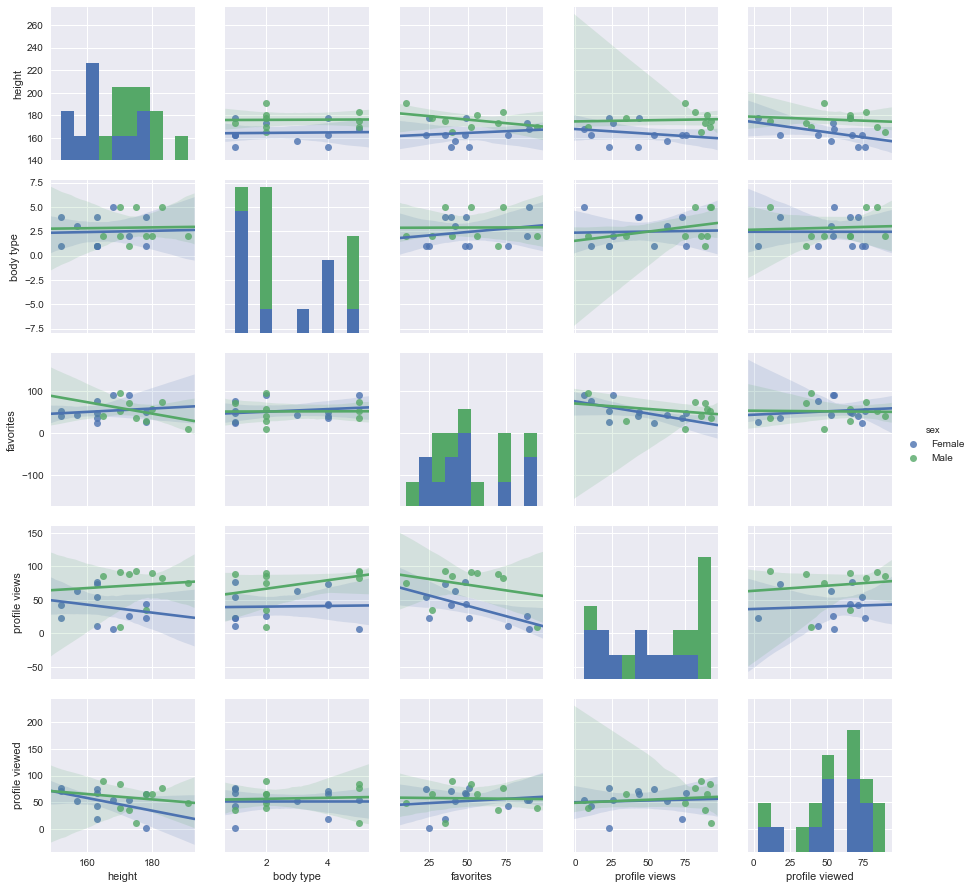

In [267]:
%matplotlib inline
import seaborn as sns
sns_plot = sns.pairplot(testdf, hue="sex", kind="reg")

sns_plot.savefig("results.png")

In [231]:
tempdf = testdf[['account type', 'sex', 'favorites', 'profile views', 'profile viewed']].groupby(['sex', 'account type']).mean()

In [232]:
tempdf

favorites  profile views  profile viewed
sex    account type                                          
Female attractive    51.545455      40.181818       52.818182
       generous            NaN            NaN             NaN
Male   attractive    60.000000      63.000000       58.200000
       generous      39.500000      84.000000       56.500000

In [269]:
ddf[['sex', 'height']].groupby('sex').mean()

height
sex               
Female  160.565217
Male    172.894737

# Section 2 - new analysis

In [2]:
import pandas as pd

df     = pd.read_csv('silverpop_dump.CSV')
cities = pd.read_csv('cities.csv')
states = pd.read_csv('us_population.csv', encoding='latin1')
densities = pd.read_json('us-states.json')
#df = df.merge(cities, left_on='city', right_on='city')



C:\Users\Mathieu Lemay\Anaconda3\envs\ztdl\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

Account ID Account Type Activated Status   Age Background Check Date  \
0            66676     Generous        Activated  65.0            03/02/2016   
1            92898     Generous        Activated  65.0                   NaN   
2            67247     Generous        Activated  56.0                   NaN   
3            90152     Generous        Activated  45.0                   NaN   
4            70690     Generous        Activated  35.0                   NaN   
5            70396   Attractive        Activated  34.0                   NaN   
6            66731   Attractive    Not Activated  34.0                   NaN   
7            67099     Generous        Activated  48.0                   NaN   
8            69553     Generous        Activated  48.0                   NaN   
9            62529   Attractive        Activated  42.0                   NaN   
10           94368   Attractive    Not Activated  48.0                   NaN   
11           69375     Generous        Activated  52.0                   NaN   
12           62722     Generous        Activated  58.0                   NaN   
13           67488     Generous        Activated  57.0                   NaN   
14           75535     Generous        Activated  43.0            02/28/2018   
15           75971     Generous        Activated  60.0            10/23/2016   
16           67537     Generous        Activated  48.0                   NaN   
17           61938     Generous    Not Activated  40.0                   NaN   
18           70426     Generous    Not Activated  36.0                   NaN   
19           92073     Generous        Activated  72.0            03/23/2017   
20           60442     Generous        Activated  52.0                   NaN   
21           87424   Attractive    Not Activated  38.0                   NaN   
22           70638     Generous        Activated  62.0                   NaN   
23           63929     Generous        Activated  34.0            08/02/2016   
24           82384     Generous    Not Activated  41.0                   NaN   
25           75239     Generous        Activated  58.0            02/27/2018   
26           69860     Generous        Activated  56.0            05/21/2018   
27           59628     Generous        Activated  74.0            03/25/2016   
28           63649   Attractive        Activated  33.0            04/03/2018   
29           58975     Generous    Not Activated  53.0                   NaN   
...            ...          ...              ...   ...                   ...   
116235    15688439   Attractive        Activated  42.0                   NaN   
116236    15692444   Attractive        Activated  19.0                   NaN   
116237    15692451   Attractive    Not Activated  24.0                   NaN   
116238    15692622     Generous        Activated  29.0                   NaN   
116239    15692666   Attractive    Not Activated  24.0                   NaN   
116240    15692771     Generous        Activated  58.0                   NaN   
116241    15692798   Attractive    Not Activated  23.0                   NaN   
116242    15692806   Attractive    Not Activated  18.0                   NaN   
116243    15692347     Generous    Not Activated   NaN                   NaN   
116244    15692348   Attractive        Activated  31.0                   NaN   
116245    15692349   Attractive        Activated  21.0                   NaN   
116246    15692350   Attractive    Not Activated  19.0                   NaN   
116247    15692352   Attractive    Not Activated  22.0                   NaN   
116248    15692353   Attractive        Activated  22.0                   NaN   
116249    15692354     Generous        Activated  44.0                   NaN   
116250    15692355   Attractive        Activated  21.0                   NaN   
116251    15692310   Attractive    Not Activated  23.0                   NaN   
116252    15692313   Attractive    Not Activated  22.0                   NaN   
116253  

In [4]:
df = df.dropna(thresh=2)

In [5]:
df

Account ID Account Type Activated Status   Age Background Check Date  \
0            66676     Generous        Activated  65.0            03/02/2016   
1            92898     Generous        Activated  65.0                   NaN   
2            67247     Generous        Activated  56.0                   NaN   
3            90152     Generous        Activated  45.0                   NaN   
4            70690     Generous        Activated  35.0                   NaN   
5            70396   Attractive        Activated  34.0                   NaN   
6            66731   Attractive    Not Activated  34.0                   NaN   
7            67099     Generous        Activated  48.0                   NaN   
8            69553     Generous        Activated  48.0                   NaN   
9            62529   Attractive        Activated  42.0                   NaN   
10           94368   Attractive    Not Activated  48.0                   NaN   
11           69375     Generous        Activated  52.0                   NaN   
12           62722     Generous        Activated  58.0                   NaN   
13           67488     Generous        Activated  57.0                   NaN   
14           75535     Generous        Activated  43.0            02/28/2018   
15           75971     Generous        Activated  60.0            10/23/2016   
16           67537     Generous        Activated  48.0                   NaN   
17           61938     Generous    Not Activated  40.0                   NaN   
18           70426     Generous    Not Activated  36.0                   NaN   
19           92073     Generous        Activated  72.0            03/23/2017   
20           60442     Generous        Activated  52.0                   NaN   
21           87424   Attractive    Not Activated  38.0                   NaN   
22           70638     Generous        Activated  62.0                   NaN   
23           63929     Generous        Activated  34.0            08/02/2016   
24           82384     Generous    Not Activated  41.0                   NaN   
25           75239     Generous        Activated  58.0            02/27/2018   
26           69860     Generous        Activated  56.0            05/21/2018   
27           59628     Generous        Activated  74.0            03/25/2016   
28           63649   Attractive        Activated  33.0            04/03/2018   
29           58975     Generous    Not Activated  53.0                   NaN   
...            ...          ...              ...   ...                   ...   
116232    15688122   Attractive        Activated  20.0                   NaN   
116233    15688127   Attractive        Activated  27.0                   NaN   
116234    15688162   Attractive        Activated  32.0                   NaN   
116235    15688439   Attractive        Activated  42.0                   NaN   
116236    15692444   Attractive        Activated  19.0                   NaN   
116237    15692451   Attractive    Not Activated  24.0                   NaN   
116238    15692622     Generous        Activated  29.0                   NaN   
116239    15692666   Attractive    Not Activated  24.0                   NaN   
116240    15692771     Generous        Activated  58.0                   NaN   
116241    15692798   Attractive    Not Activated  23.0                   NaN   
116242    15692806   Attractive    Not Activated  18.0                   NaN   
116243    15692347     Generous    Not Activated   NaN                   NaN   
116244    15692348   Attractive        Activated  31.0                   NaN   
116245    15692349   Attractive        Activated  21.0                   NaN   
116246    15692350   Attractive    Not Activated  19.0                   NaN   
116247    15692352   Attractive    Not Activated  22.0                   NaN   
116248    15692353   Attractive        Activated  22.0                   NaN   
116249    15692354     Generous        Activated  44.0                   NaN   
116250  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116130 entries, 0 to 116261
Data columns (total 47 columns):
Account ID                      116130 non-null int64
Account Type                    116130 non-null object
Activated Status                116130 non-null object
Age                             100637 non-null float64
Background Check Date           22251 non-null object
Birthday                        100637 non-null object
Body Type                       100355 non-null object
Children                        72903 non-null float64
City                            98310 non-null object
Country                         98312 non-null object
Drinking Habit                  99498 non-null object
Ethnicity                       100343 non-null object
Exit Reason                     14865 non-null object
Favorites Received              116130 non-null float64
Favorites Sent                  116130 non-null float64
Gender                          116130 non-null object
Hair Color  

In [7]:
df.describe()

Account ID            Age      Children  Favorites Received  \
count  1.161300e+05  100637.000000  72903.000000       116130.000000   
mean   1.018979e+07      37.380596      0.305063          339.007974   
std    4.792715e+06      84.225843      0.771102         1043.012345   
min    5.365400e+04      18.000000      0.000000            0.000000   
25%    6.220920e+06      23.000000      0.000000            0.000000   
50%    1.141818e+07      32.000000      0.000000           41.000000   
75%    1.444760e+07      43.000000      0.000000          269.000000   
max    1.569284e+07    2018.000000      6.000000        87509.000000   

       Favorites Sent        Income  Messages Received  Messages Sent  \
count   116130.000000  4.425900e+04       88510.000000  116130.000000   
mean       300.032412  2.904156e+05        1450.133793    1376.845759   
std       1652.109531  2.729575e+05        3602.817591    4382.081899   
min          0.000000  5.000000e+04         -24.000000       0.000000   
25%          0.000000  1.000000e+05          31.000000       0.000000   
50%         15.000000  2.000000e+05         299.000000      76.000000   
75%        136.000000  4.000000e+05        1297.000000     840.000000   
max     157370.000000  1.000001e+06      128153.000000  186202.000000   

          Net Worth  Past Session Count  Private Photo Count  \
count  4.394300e+04       116130.000000        116130.000000   
mean   4.970243e+06           21.709885             1.641126   
std    1.518170e+07           66.644450             4.086295   
min    1.000000e+05            0.000000             0.000000   
25%    5.000000e+05            2.000000             0.000000   
50%    1.000000e+06            5.000000             0.000000   
75%    2.000000e+06           16.000000             2.000000   
max    1.000000e+08         6322.000000           201.000000   

       Profile Completion Percent  Public Photo Count  Recurring Subscription  \
count               116130.000000       116130.000000           116130.000000   
mean                    78.246792            2.482959                0.000913   
std                     32.790866            5.875387                0.030198   
min                     10.000000            0.000000                0.000000   
25%                     50.000000            0.000000                0.000000   
50%                    100.000000            1.000000                0.000000   
75%                    100.000000            3.000000                0.000000   
max                    100.000000          371.000000                1.000000   

             Revenue  Unread Message Count  Upgrade Count  
count  116130.000000          27448.000000  116130.000000  
mean      233.802868             53.076945       2.657582  
std       615.797559            294.563912       7.001555  
min         0.000000              0.000000       0.000000  
25%         0.000000              0.000000       0.000000  
50%         0.000000              4.000000       0.000000  
75%        97.787500             27.000000       2.000000  
max     18096.340000          20856.000000     341.000000

In [8]:
df.groupby(['Gender', 'Account Type']).describe().to_csv('preview.csv')

In [9]:
df.groupby(['Gender', 'Account Type']).describe()

Account ID           Age      Children  \
Gender Account Type                                                   
Female Attractive   count  4.679600e+04  44559.000000  37414.000000   
                    mean   1.104430e+07     28.571781      0.210964   
                    std    4.580330e+06     71.587778      0.642990   
                    min    5.871900e+04     18.000000      0.000000   
                    25%    7.780592e+06     21.000000      0.000000   
                    50%    1.217582e+07     24.000000      0.000000   
                    75%    1.559960e+07     29.000000      0.000000   
                    max    1.569284e+07   2018.000000      6.000000   
       Generous     count  8.260000e+02    675.000000    324.000000   
                    mean   1.044471e+07     50.426667      0.685185   
                    std    5.267051e+06    170.427004      1.137442   
                    min    8.060900e+04     18.000000      0.000000   
                    25%    4.898380e+06     27.000000      0.000000   
                    50%    1.204632e+07     35.000000      0.000000   
                    75%    1.568170e+07     43.000000      1.000000   
                    max    1.569280e+07   2018.000000      6.000000   
Male   Attractive   count  9.634000e+03   8357.000000   6583.000000   
                    mean   1.113562e+07     36.298432      0.107246   
                    std    4.873446e+06    139.383132      0.487816   
                    min    6.106500e+04     18.000000      0.000000   
                    25%    7.262494e+06     21.000000      0.000000   
                    50%    1.254253e+07     24.000000      0.000000   
                    75%    1.567216e+07     29.000000      0.000000   
                    max    1.569283e+07   2018.000000      6.000000   
       Generous     count  5.887400e+04  47046.000000  28582.000000   
                    mean   9.352247e+06     45.728797      0.469491   
                    std    4.788512e+06     79.426242      0.925610   
                    min    5.365400e+04     18.000000      0.000000   
                    25%    5.021286e+06     35.000000      0.000000   
                    50%    1.028781e+07     42.000000      0.000000   
                    75%    1.345552e+07     49.000000      0.000000   
                    max    1.569282e+07   2018.000000      6.000000   

                           Favorites Received  Favorites Sent        Income  \
Gender Account Type                                                           
Female Attractive   count        46796.000000    46796.000000  1.680000e+02   
                    mean           126.329857      144.776156  1.623512e+05   
                    std            369.007184     1400.858667  2.652674e+05   
                    min              0.000000        0.000000  5.000000e+04   
                    25%              0.000000        0.000000  5.000000e+04   
                    50%             31.000000       11.000000  5.000000e+04   
                    75%            130.000000       67.000000  1.000000e+05   
                    max          28305.000000   157370.000000  1.000001e+06   
       Generous     count          826.000000      826.000000  4.490000e+02   
                    mean           281.378935       72.401937  2.584633e+05   
                    std           1547.797078      392.368983  2.891032e+05   
                    min              0.000000        0.000000  5.000000e+04   
                    25%              0.000000        0.000000  5.000000e+04   
                    50%              0.000000        0.000000  1.250000e+05   
                    75%              8.750000        1.000000  3.000000e+05   
                    max          35625.000000     5788.000000  1.000001e+06   
Male   Attractive   count         9634.000000     9634.000000  3.000000e+01   
                    mean             9.784306       70.057297  1.066667e+05   
                    std           

In [18]:
subdf = df[['Gender', 'Account Type', 'Favorites Received', 'Favorites Sent', 'Messages Received', 'Messages Sent', 'Income', 'Net Worth']]
df[['Gender', 'Account Type', 'Favorites Received', 'Favorites Sent', 'Messages Received', 'Messages Sent', 'Income', 'Net Worth']].describe()

Favorites Received  Favorites Sent  Messages Received  Messages Sent  \
count       116130.000000   116130.000000       88510.000000  116130.000000   
mean           339.007974      300.032412        1450.133793    1376.845759   
std           1043.012345     1652.109531        3602.817591    4382.081899   
min              0.000000        0.000000         -24.000000       0.000000   
25%              0.000000        0.000000          31.000000       0.000000   
50%             41.000000       15.000000         299.000000      76.000000   
75%            269.000000      136.000000        1297.000000     840.000000   
max          87509.000000   157370.000000      128153.000000  186202.000000   

             Income     Net Worth  
count  4.425900e+04  4.394300e+04  
mean   2.904156e+05  4.970243e+06  
std    2.729575e+05  1.518170e+07  
min    5.000000e+04  1.000000e+05  
25%    1.000000e+05  5.000000e+05  
50%    2.000000e+05  1.000000e+06  
75%    4.000000e+05  2.000000e+06  
max    1.000001e+06  1.000000e+08

In [25]:
subdf[(subdf['Gender'] == 'Male') & (subdf['Account Type'] == 'Generous')]

Gender Account Type  Favorites Received  Favorites Sent  \
0        Male     Generous              5558.0           774.0   
1        Male     Generous              4172.0           256.0   
2        Male     Generous                 6.0            14.0   
3        Male     Generous              1099.0          1252.0   
4        Male     Generous               567.0           114.0   
7        Male     Generous               290.0           672.0   
8        Male     Generous              3495.0           423.0   
11       Male     Generous              1508.0           520.0   
12       Male     Generous               318.0           625.0   
13       Male     Generous               769.0            89.0   
14       Male     Generous              1495.0          2681.0   
15       Male     Generous              2373.0           684.0   
16       Male     Generous              4830.0             6.0   
17       Male     Generous                 0.0             0.0   
18       Male     Generous                 0.0             0.0   
19       Male     Generous               499.0            59.0   
20       Male     Generous              5270.0         20953.0   
22       Male     Generous               265.0           245.0   
23       Male     Generous              1731.0           319.0   
24       Male     Generous                 0.0             0.0   
25       Male     Generous              5377.0           306.0   
26       Male     Generous               174.0            57.0   
27       Male     Generous              8573.0            73.0   
29       Male     Generous                90.0             7.0   
30       Male     Generous              2905.0           426.0   
31       Male     Generous               950.0            19.0   
32       Male     Generous              3895.0          2535.0   
33       Male     Generous               776.0           746.0   
34       Male     Generous              9418.0         12660.0   
35       Male     Generous               391.0             9.0   
...       ...          ...                 ...             ...   
116043   Male     Generous                 0.0             0.0   
116045   Male     Generous                 0.0             0.0   
116058   Male     Generous                 0.0             0.0   
116063   Male     Generous                 0.0             2.0   
116068   Male     Generous                 0.0             0.0   
116082   Male     Generous                 0.0             0.0   
116084   Male     Generous                 0.0             0.0   
116086   Male     Generous                 0.0             0.0   
116087   Male     Generous                 0.0             0.0   
116099   Male     Generous                 0.0             0.0   
116110   Male     Generous                 0.0             0.0   
116118   Male     Generous                 0.0             0.0   
116126   Male     Generous                 0.0             0.0   
116129   Male     Generous                 0.0             0.0   
116131   Male     Generous                 0.0             0.0   
116132   Male     Generous                 0.0             0.0   
116198   Male     Generous                 0.0             0.0   
116204   Male     Generous                 0.0             0.0   
116207   Male     Generous                10.0             3.0   
116208   Male     Generous                 4.0             0.0   
116209   Male     Generous                 0.0            48.0   
116216   Male     Generous                 0.0             0.0   
116217   Male     Generous                 0.0             0.0   
116238   Male     Generous                 0.0             0.0   
116240   Male     Generous                 0.0             0.0   
116243   Male     Generous                 0.0             0.0   
116249   Male     Generous                 0.0             0.0   
116254   Male     Generous                 0.0             0.0   
116259   Male     Generous                 0.0 

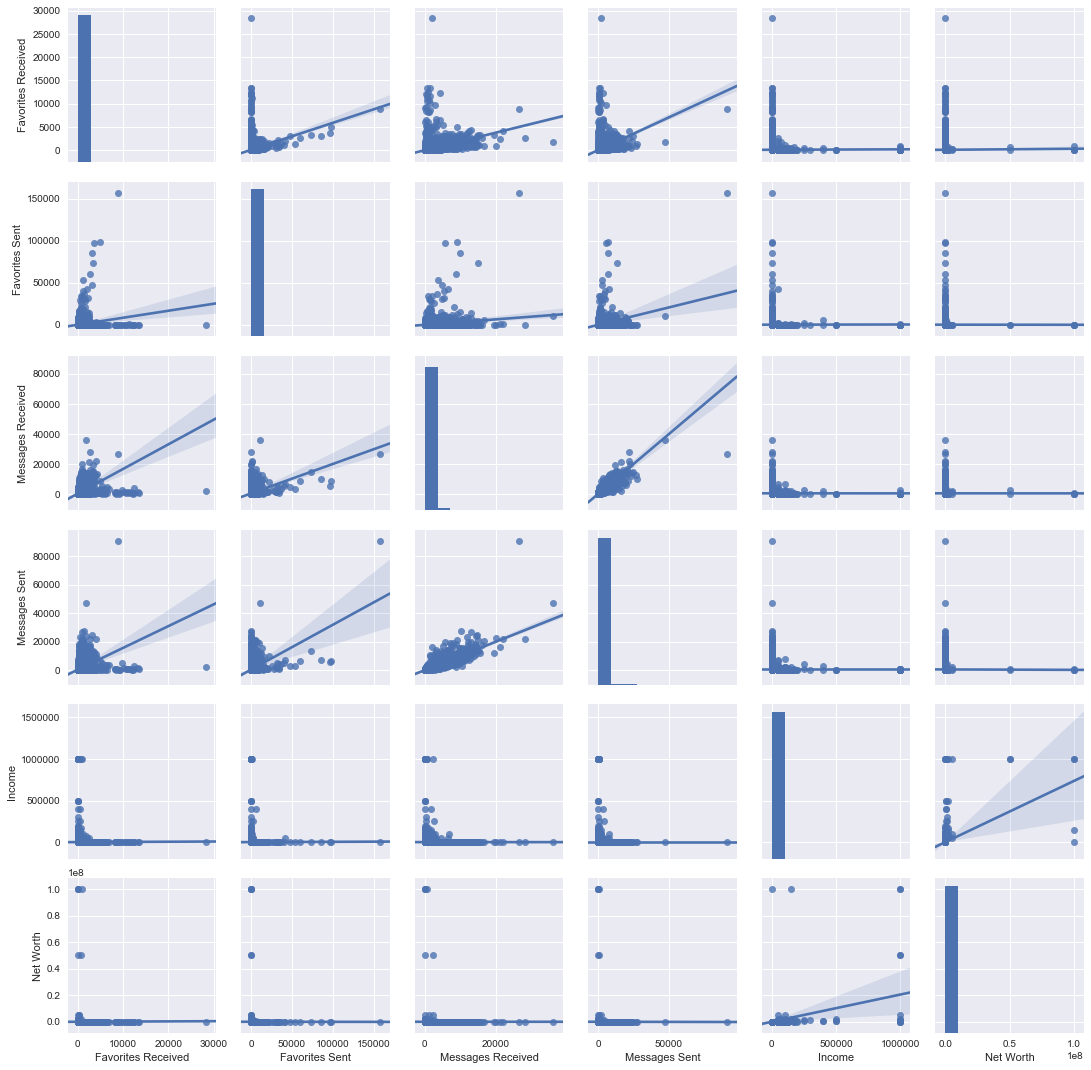

In [36]:
%matplotlib inline
import seaborn as sns
sns_plot = sns.pairplot(subdf[(subdf['Gender'] == 'Female') & (subdf['Account Type'] == 'Attractive')].fillna(0), kind="reg")

sns_plot.savefig("AttractiveFemales.png")

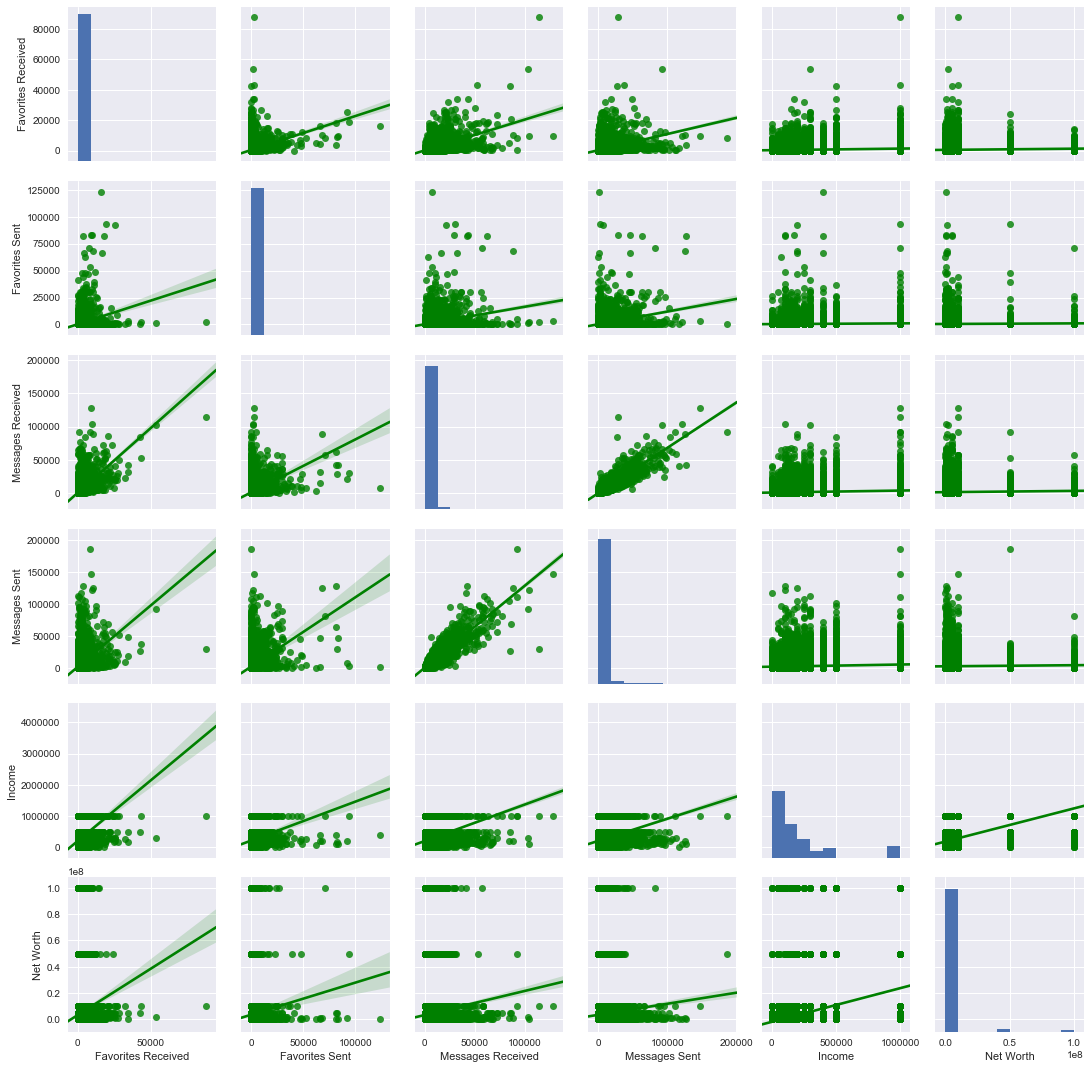

In [38]:
%matplotlib inline
import seaborn as sns
sns_plot = sns.pairplot(subdf[(subdf['Gender'] == 'Male') & (subdf['Account Type'] == 'Generous')].fillna(0), kind="reg", plot_kws={'color':'green'})

sns_plot.savefig("GenerousMales.png")

In [ ]:
regline = sns_plot.ax_joint.get_lines()[0]
regline.set_color('green')
regline.set_zorder('5')